# Elevador

In [1]:
!pip install scikit-fuzzy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Antecedentes: <br>
Massa que vai entrar <br>
Andar atual <br>
Andar destino <br>

------------------

Massa atual <br>
Distância de mim

Consequentes: <br>
Elevador escolhido (1 ou 2)

In [3]:
x_massa_atual = np.arange(0, 420, 1)
x_distancia = np.arange(0, 11, 1)
x_resultado = np.arange(0, 11, 1)

In [5]:
massa_atual = ctrl.Antecedent(x_massa_atual, 'massa_atual')
distancia = ctrl.Antecedent(x_distancia, 'distancia')
resultado = ctrl.Consequent(x_resultado, 'resultado')

In [6]:
massa_atual['muito_leve'] = fuzz.zmf(x_massa_atual, 50, 101)
massa_atual['leve'] = fuzz.trapmf(x_massa_atual, [40, 80, 100, 140])
massa_atual['pesado'] = fuzz.trapmf(x_massa_atual, [130, 230, 280, 320])
massa_atual['muito_pesado'] = fuzz.smf(x_massa_atual, 300, 400)

distancia['muito_proximo'] = fuzz.zmf(x_distancia, 2, 4)
distancia['proximo'] = fuzz.trapmf(x_distancia, [3, 4, 5, 6])
distancia['distante'] = fuzz.trapmf(x_distancia, [5, 7, 8, 9])
distancia['muito_distante'] = fuzz.smf(x_distancia, 8, 9)

resultado['muito_ruim'] = fuzz.zmf(x_resultado, 2, 3)
resultado['ruim'] = fuzz.trapmf(x_resultado, [3, 4, 5, 6])
resultado['bom'] = fuzz.trapmf(x_distancia, [5, 7, 8, 9])
resultado['muito_bom'] = fuzz.smf(x_distancia, 8, 9)


#resultado['muito_baixo'] = fuzz.zmf(x_resultado, 2, 3)
#resultado['baixo'] = fuzz.trapmf(x_resultado, [2, 5, 6, 7])
#resultado['alto'] = fuzz.smf(x_resultado, 7, 9)
#resultado['muito_alto'] = fuzz.smf(x_resultado, 8, 10)

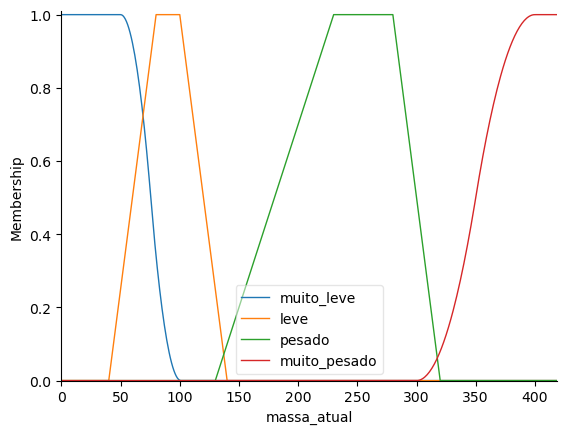

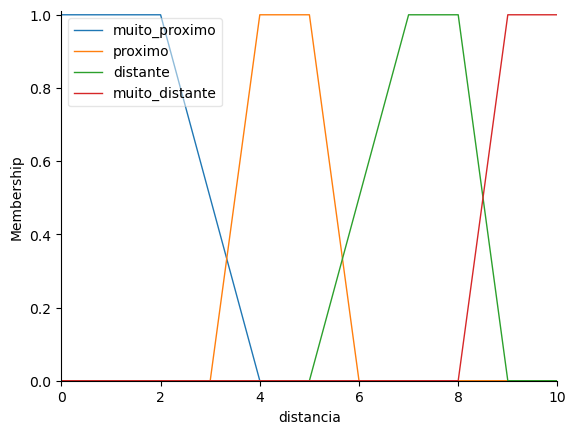

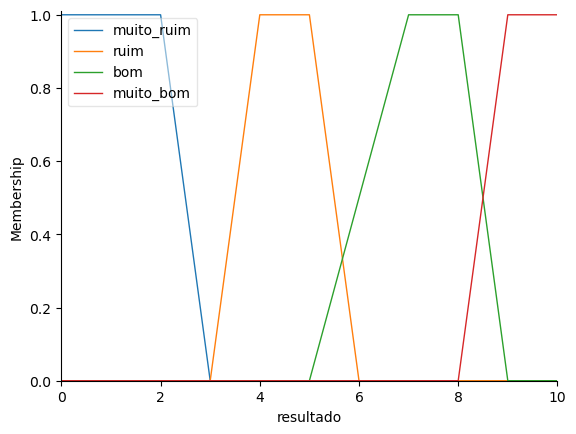

In [15]:
massa_atual.view()
distancia.view()
resultado.view()

Regras

Questões:
1. Sentido -> Se oposto, já descarto aquele elevador de cara? Mas e se os dois estiverem em sentidos opostos?



In [7]:
rule1 = ctrl.Rule(massa_atual['muito_leve'] & distancia['muito_proximo'], resultado['muito_bom'])
rule2 = ctrl.Rule(massa_atual['muito_leve'] & distancia['proximo'], resultado['muito_bom'])
rule3 = ctrl.Rule(massa_atual['muito_leve'] & distancia['distante'], resultado['ruim'])
rule4 = ctrl.Rule(massa_atual['muito_leve'] & distancia['muito_distante'], resultado['ruim'])

rule5 = ctrl.Rule(massa_atual['leve'] & distancia['muito_proximo'], resultado['muito_bom'])
rule6 = ctrl.Rule(massa_atual['leve'] & distancia['proximo'], resultado['bom'])
rule7 = ctrl.Rule(massa_atual['leve'] & distancia['distante'], resultado['ruim'])
rule8 = ctrl.Rule(massa_atual['leve'] & distancia['muito_distante'], resultado['muito_ruim'])

rule9 = ctrl.Rule(massa_atual['pesado'] & distancia['muito_proximo'], resultado['bom'])
rule10 = ctrl.Rule(massa_atual['pesado'] & distancia['proximo'], resultado['ruim'])
rule11 = ctrl.Rule(massa_atual['pesado'] & distancia['distante'], resultado['ruim'])
rule12 = ctrl.Rule(massa_atual['pesado'] & distancia['muito_distante'], resultado['muito_ruim'])

rule13 = ctrl.Rule(massa_atual['muito_pesado'] & distancia['muito_proximo'], resultado['bom'])
rule14 = ctrl.Rule(massa_atual['muito_pesado'] & distancia['proximo'], resultado['muito_ruim'])
rule15 = ctrl.Rule(massa_atual['muito_pesado'] & distancia['distante'], resultado['muito_ruim'])
rule16 = ctrl.Rule(massa_atual['muito_pesado'] & distancia['muito_distante'], resultado['muito_ruim'])

In [8]:
SE_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
SE = ctrl.ControlSystemSimulation(SE_ctrl)

In [30]:
# Valores = 70, 10; 0, 10; 0, 7; 150, 1; 80, 3

elevador1 = {
    'massa': 150,
    'andar': 6
}

SE.input['massa_atual'] = elevador1['massa']
SE.input['distancia'] = elevador1['andar']

4.5


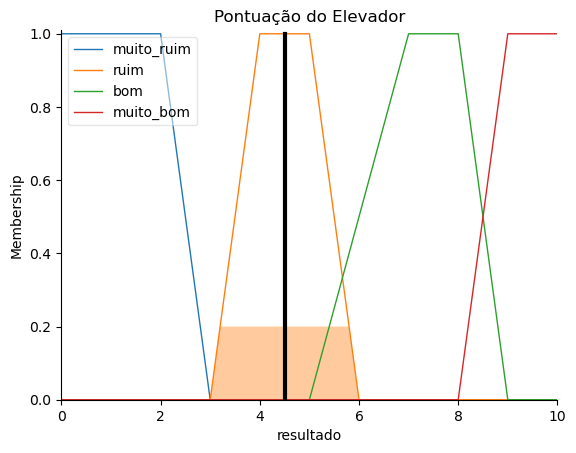

In [31]:
# Valores = 70, 10; 0, 10; 0, 7; 150, 1; 80, 3

elevador1 = {
    'massa': 150,
    'andar': 6
}

SE.input['massa_atual'] = elevador1['massa']
SE.input['distancia'] = elevador1['andar']

In [ ]:

elevador2 = {
    'massa': 30,
    'andar': 6
}

# Elevador 2
SE.input['massa_atual'] = elevador2['massa']
SE.input['distancia'] = elevador2['andar']

In [4]:
SE.compute()
print(SE.output['resultado'])
resultado.view(sim=SE)

# Adicionando um título ao gráfico
plt.title("Elevador 2")

# Mostrando o gráfico
plt.show()

NameError: name 'SE' is not defined

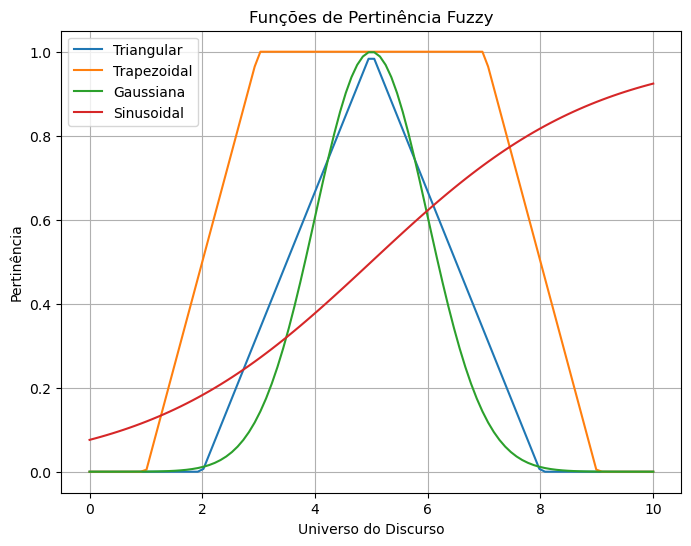

In [5]:
# Criando o universo do discurso
x = np.linspace(0, 10, 100)

# Criando as funções de pertinência
triangular = fuzz.trimf(x, [2, 5, 8])
trapezoidal = fuzz.trapmf(x, [1, 3, 7, 9])
gaussiana = fuzz.gaussmf(x, 5, 1)
sinusoidal = fuzz.sigmf(x, 5, 0.5)

# Plotando as funções de pertinência
plt.figure(figsize=(8, 6))
plt.plot(x, triangular, label='Triangular')
plt.plot(x, trapezoidal, label='Trapezoidal')
plt.plot(x, gaussiana, label='Gaussiana')
plt.plot(x, sinusoidal, label='Sinusoidal')
plt.title('Funções de Pertinência Fuzzy')
plt.xlabel('Universo do Discurso')
plt.ylabel('Pertinência')
plt.legend()
plt.grid(True)
plt.show()

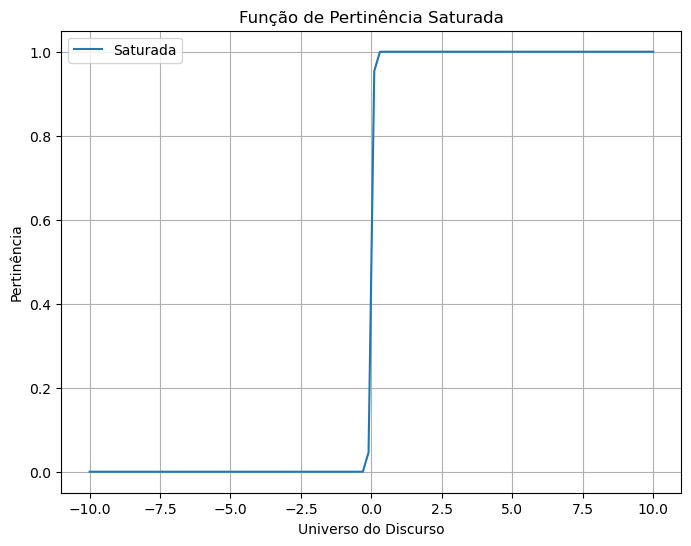

In [13]:
# Criando o universo do discurso
x = np.linspace(-10, 10, 100)

# Definindo os parâmetros da função de pertinência saturada
centroide = 0
inclinacao = 30

# Criando a função de pertinência saturada
saturada = fuzz.sigmf(x, centroide, inclinacao)

# Plotando a função de pertinência saturada
plt.figure(figsize=(8, 6))
plt.plot(x, saturada, label='Saturada')
plt.title('Função de Pertinência Saturada')
plt.xlabel('Universo do Discurso')
plt.ylabel('Pertinência')
plt.legend()
plt.grid(True)
plt.show()